In [1]:
import sys
sys.path.append('/scratch/programming/pipeline/pipeline/in_development/Will')
from cell_extractor.CellDetectorBase import CellDetectorBase
from cell_extractor.CellDetector import CellDetector
from cell_extractor.CellDetectorTrainer import CellDetectorTrainer
from cell_extractor.BorderFinder import BorderFinder

ModuleNotFoundError: No module named 'cell_extractor'

In [2]:
detector = CellDetector(animal = 'DK55',round=2,segmentation_threshold = 2000)
detection_df = detector.get_detection_results()

version of xgboost is: 1.5.0 should be at least 1.5.0


/usr/local/share/pipeline/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


{'eta': 0.3, 'objective': 'binary:logistic', 'nthread': 7}


/usr/local/share/pipeline/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


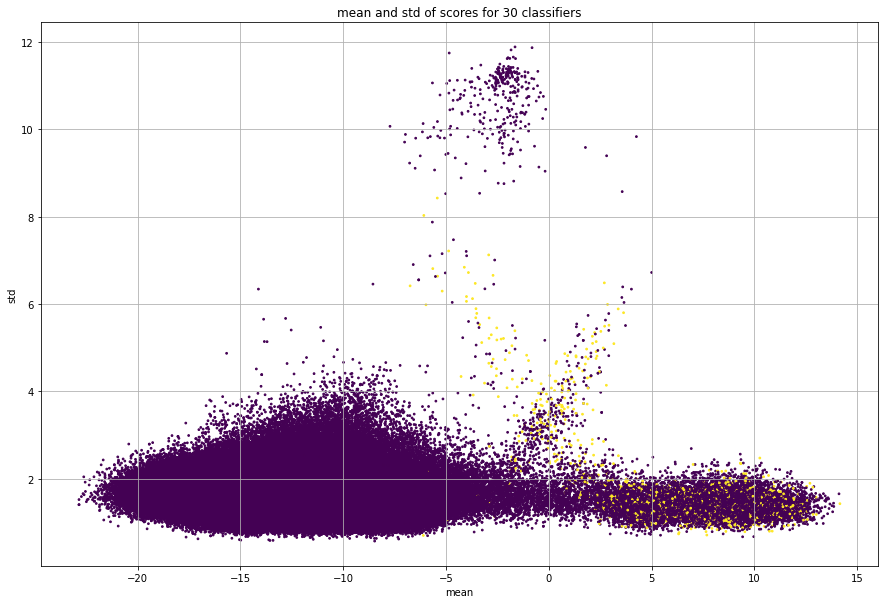

In [8]:
features = detector.get_combined_features_for_detection()
detector.detector.plot_score_scatter(features)

In [5]:
sure = detection_df[detection_df.predictions==2]
unsure = detection_df[detection_df.predictions==0]
print(f'sure {len(sure)}, unsure  {len(unsure)}, total detection {len(detection_df)}')

sure 14022, unsure  393, total detection 14415


version of xgboost is: 1.5.0 should be at least 1.5.0


/usr/local/share/pipeline/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


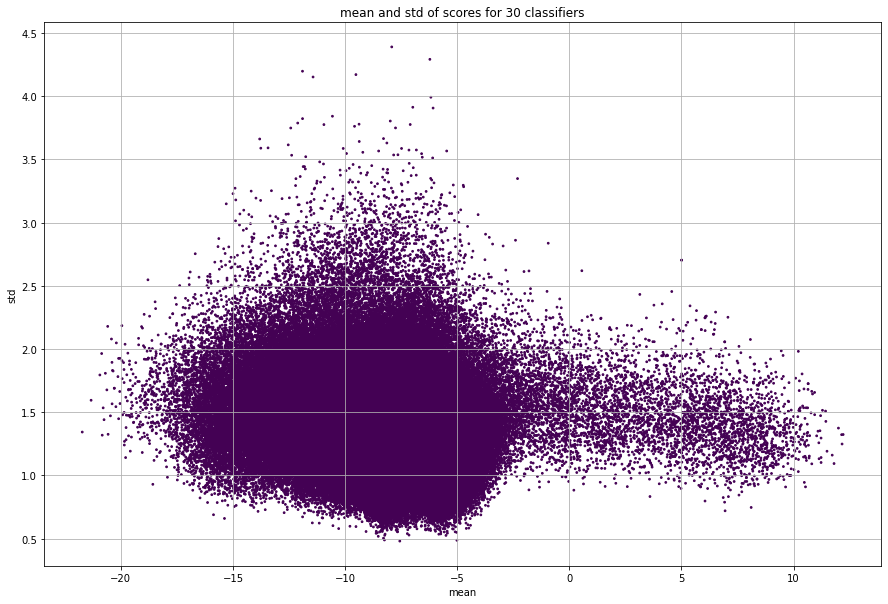

In [6]:
detector = CellDetector('DK46',round=2,segmentation_threshold=2000)
features = detector.get_combined_features_for_detection()
detector.detector.plot_score_scatter(features)

/usr/local/share/pipeline/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


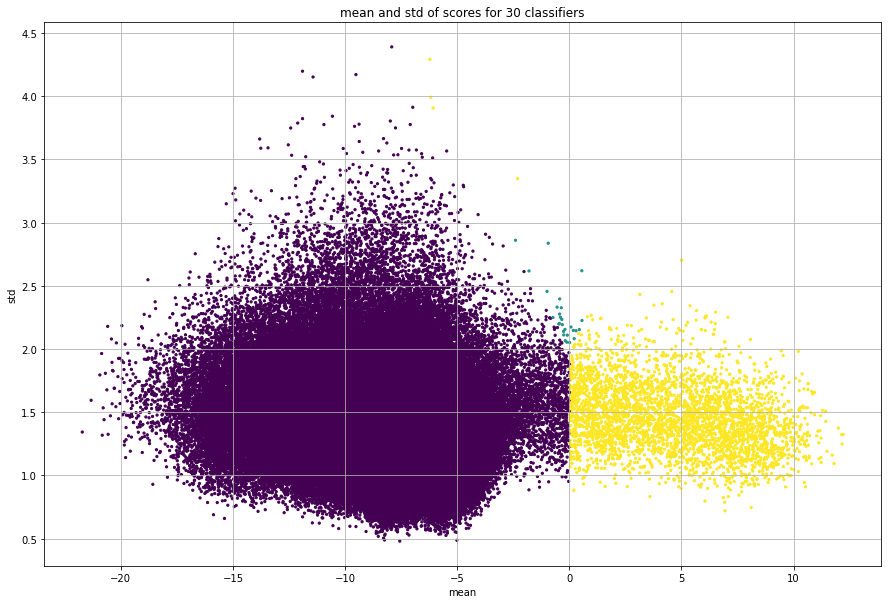

In [7]:
detector.detector.plot_decision_scatter(features)

In [8]:
base = CellDetectorBase()
for animali in base.get_available_animals():
    animal = CellDetectorBase(animali,round = 2)
    if animal.has_detection():
        print(animali)
        detections = animal.load_detections()
        sure = detections[detections.predictions==2]
        unsure = detections[detections.predictions==0]
        print(f'sure rate{len(sure)/len(detections)*100}, unsure rate {len(unsure)/len(detections)*100}, total detection {len(detections)}')

DK41
sure rate71.4340885684861, unsure rate 28.565911431513904, total detection 7768
DK52
sure rate86.22533294449305, unsure rate 13.774667055506951, total detection 10287
DK55
sure rate97.20475192173306, unsure rate 2.795248078266946, total detection 12879
DK46
sure rate75.72703714367982, unsure rate 24.272962856320184, total detection 3473
DK50
sure rate53.593863251993234, unsure rate 46.406136748006766, total detection 16556
DK43
sure rate82.49745602558511, unsure rate 17.502543974414884, total detection 6879
DK54
sure rate65.990990990991, unsure rate 34.00900900900901, total detection 2664


In [9]:
base = CellDetectorBase()
for animali in base.get_available_animals():
    animal = CellDetectorBase(animali,round = 2)
    if animal.has_detection():
        print(animali)
        detections = animal.load_detections()
        sure = detections[detections.predictions==2]
        unsure = detections[detections.predictions==0]
        print(f'sure rate{len(sure)}, unsure rate {len(unsure)}, total detection {len(detections)}')

DK41
sure rate5549, unsure rate 2219, total detection 7768
DK52
sure rate8870, unsure rate 1417, total detection 10287
DK55
sure rate12519, unsure rate 360, total detection 12879
DK46
sure rate2630, unsure rate 843, total detection 3473
DK50
sure rate8873, unsure rate 7683, total detection 16556
DK43
sure rate5675, unsure rate 1204, total detection 6879
DK54
sure rate1758, unsure rate 906, total detection 2664


In [10]:
import pandas as pd
pd.read_csv(animal.DETECTION_RESULT_DIR)

FileNotFoundError: [Errno 2] No such file or directory: '//net/birdstore/Active_Atlas_Data//cell_segmentation/DK40/detections/detections_DK40.2_threshold_2000.csv'

In [ ]:
os.path.exists(animal.DETECTION_RESULT_DIR)

True

In [ ]:
base = CellDetector('DK46',round = 2)
detections = base.load_detections()
sure = detections[detections.predictions==2]
unsure = detections[detections.predictions==0]

version of xgboost is: 1.5.0 should be at least 1.5.0


In [ ]:
len(sure),len(unsure),len(detections)

(2630, 843, 3473)

In [ ]:
from lib.UrlGenerator import UrlGenerator
animal = 'DK46'
urlGen = UrlGenerator()
image_layer = 'precomputed://https://activebrainatlas.ucsd.edu/data/'+animal+'/neuroglancer_data/'
urlGen.add_stack_image(animal,channel=1)
urlGen.add_stack_image(animal,channel=2,color='red')
urlGen.add_stack_image(animal,channel=3,color='green')
urlGen.add_annotation_layer('Sure')
urlGen.add_annotation_layer('Unsure')
url = urlGen.get_url()
print('done')


TypeError: can only concatenate str (not "dict") to str